## Logistic Regression 
 
# Data
Data set from Kaggle

predict a classification- survival or deceased

Import the neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

checking the missing data
using seaborn to create heatmap

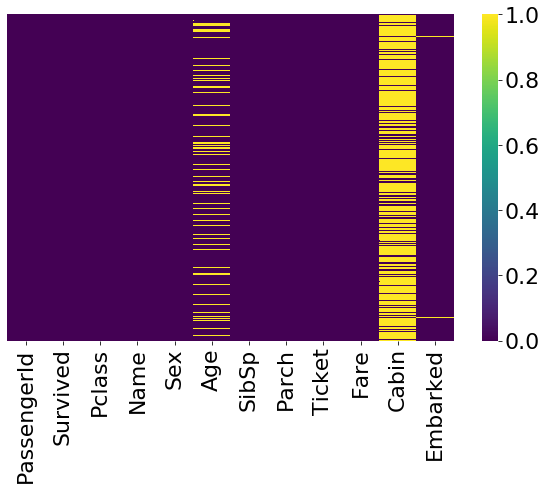

In [5]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 22})

sns.heatmap(df.isnull(),cmap='viridis', yticklabels=False)
plt.show()

About 20 percent of the Age data is currently missing. This level of missingness indicates that it can likely be addressed through imputation methods. In contrast, the Cabin column shows a significant amount of missing data, making it challenging to derive meaningful insights at a basic analysis level. As a result, we may opt to remove this column later or transform it into a binary feature such as "Cabin Known: 1 or 0".

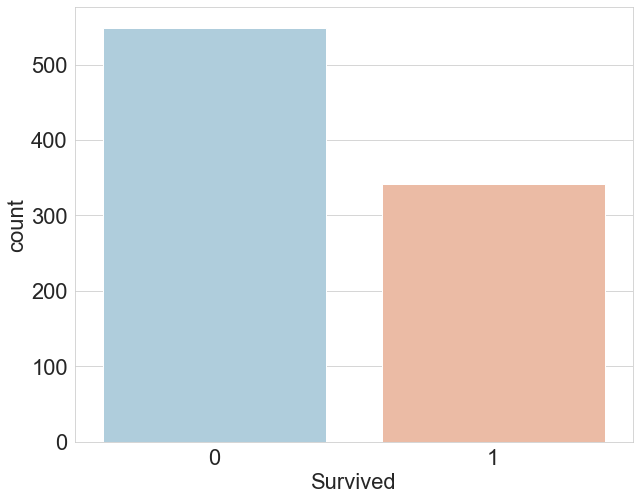

In [25]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, palette='RdBu_r')

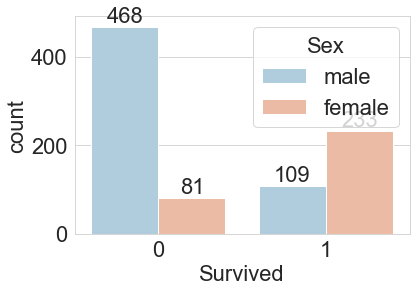

In [26]:
ax = sns.countplot(x='Survived', hue='Sex', data=df, palette='RdBu_r')
for container in ax.patches:
    height = container.get_height()
    
    ax.annotate(f'{height}', (container.get_x() + container.get_width()/2.,height)
               ,ha='center', va='center', xytext=(0, 10), textcoords='offset points')

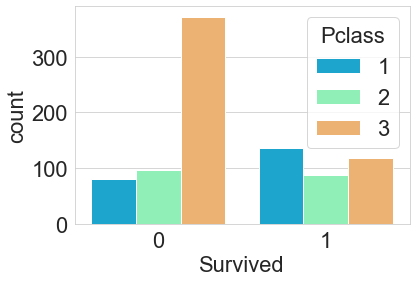

In [28]:
sns.countplot(x='Survived', hue='Pclass', data= df, palette='rainbow')

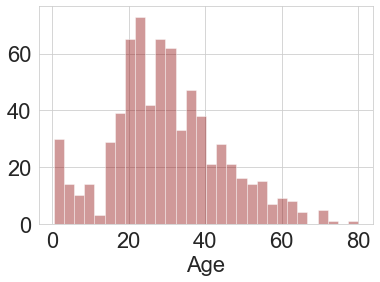

In [33]:
sns.distplot(df['Age'].dropna(),kde=False, color='darkred', bins=30)

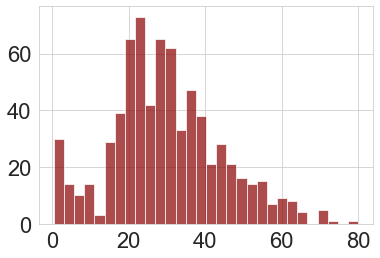

In [32]:
df['Age'].hist(bins=30, color='darkred', alpha=0.7)

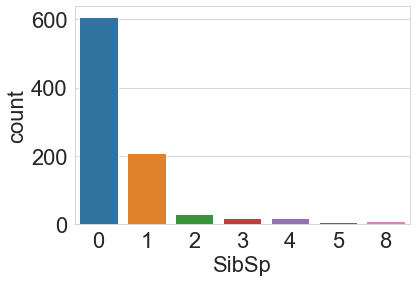

In [34]:
sns.countplot(x='SibSp', data=df)

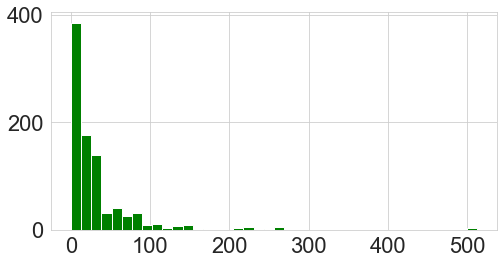

In [35]:
df['Fare'].hist(color='green', bins=40, figsize=(8,4))

****
# Data Cleaning

Fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
Another way is to check the average age by passenger class.

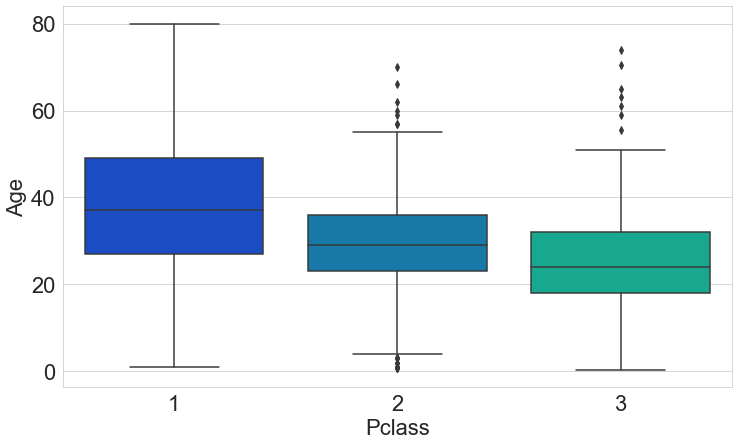

In [36]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [37]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass== 2:
            return 29
        else:
            return 24
    else:
        return age
    

In [54]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

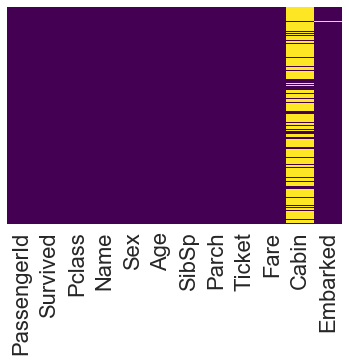

In [39]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Cabin column has too many missing values, better drop it

In [55]:
df.drop('Cabin', axis=1, inplace=True)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [56]:
df.dropna(inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## Converting Categorical Features 

Categorical features need to be converted to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [57]:
sex= pd.get_dummies(df['Sex'], drop_first=True)
embarked = pd.get_dummies(df['Embarked'],drop_first=True)
df = pd.concat([df,sex,embarked], axis=1)

In [58]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression model


## Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
 X_train, X_test, y_train, y_test = train_test_split(
     df.drop('Survived', axis=1), df['Survived'], test_size=0.3, random_state=101)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lm = LogisticRegression()
lm.fit(X_train,y_train)

/Users/elmiramoayedi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
predicts = lm.predict(X_test)

## Evaluation

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



How The model worked:

The classification report provides a comprehensive overview of how well your model is performing for each class (0 and 1).

- Class 0 (likely the majority class): The model has high precision (81%) and high recall (93%), indicating that it correctly identifies class 0 instances most of the time.


- Class 1 (likely the minority class): The model has slightly higher precision (85%) but lower recall (65%), indicating that while it identifies class 1 instances with good precision, it misses some of the actual class 1 instances.